In [28]:
#OUBADRISS ADIB
#DenseNet-121 Grape Leaves disease detection
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Model

In [1]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 10.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


This dataset was taken from this Kaggle link. https://www.kaggle.com/datasets/lavaman151/plantifydr-dataset

In [2]:
img1 =image.load_img('./Grape/train/Grape Black Measles/GrapeBlackMeasles(1).JPG')

In [3]:
train_dir ='./Grape/train' 
test_dir = './Grape/test'

In [4]:
# Checking the image dimensions with opencv

cv2.imread('./Grape/train/Grape Black Measles/GrapeBlackMeasles(4).JPG').shape

(256, 256, 3)

Building the model.

First, we'll download the DenseNet121 model from tensorflow keras applications that we imported earlier and store it in a variable.
We don't want to include the last layer because its trained to classify 1000 classes of images. Our data has only 2 classes.

In [5]:
input_shape = (224, 224, 3)

# Load the DenseNet-121 model with pre-trained weights (on ImageNet)
densenet = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

Metal device set to: Apple M1


2023-09-27 18:58:02.082031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-27 18:58:02.082784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


29084464/29084464 [==============================] - 4s 0us/step


Freezing some of the InceptionV3 layers.
All the layers in InceptionV3 come as trainable by default. This means that we have to train all the layers completely from scratch. This will be a lot of computation. Using transfer learning, we want to retain the trained weights of the model and only train a few layers along with our added model layers.

In this case, we will set all layers to non-trainable.

In [6]:
for layer in densenet.layers:
    layer.trainable = False

Preprocess training image data.

Here, we'll load in our data using ImageDataGenerator Class in tensorflow. This allows us to rescale our images and split the data into train and validation data. It also loads our images in a specified batch size.

In [7]:
IMAGE_SIZE = [224, 224]

train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )
val_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )  


train_set = train_gen.flow_from_directory(
    train_dir,
    subset = 'training',
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
)

val_set = val_gen.flow_from_directory(
    train_dir,
    subset = 'validation',
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
    )

Found 10563 images belonging to 4 classes.
Found 2638 images belonging to 4 classes.


Building the model.

We'll build a small model as the top for the DenseNet121 because we didn't include the top which is the last layer.

In [9]:
#DenseNet121 Model
x = Flatten()(densenet.output)
output_layer = Dense(4, activation='softmax')(x)
model = Model(inputs=densenet.input, outputs=output_layer)

In [10]:
# Checking the final model.

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [11]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy']
    )

In [12]:
DenseNet121_model = model.fit_generator(
     train_set,
     validation_data=val_set, 
     epochs=5,
     steps_per_epoch = len(train_set),
     validation_steps = len(val_set),)

Epoch 1/5


/var/folders/87/5ylh42k5731_kbmw9pws03fc0000gn/T/ipykernel_38179/528415959.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  DenseNet121_model = model.fit_generator(
2023-09-27 19:01:04.340382: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-27 19:01:06.532108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


661/661 [==============================] - ETA: 0s - loss: 0.3492 - accuracy: 0.8815

2023-09-27 19:02:58.195583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


661/661 [==============================] - 142s 207ms/step - loss: 0.3492 - accuracy: 0.8815 - val_loss: 0.1121 - val_accuracy: 0.9666
Epoch 2/5
661/661 [==============================] - 138s 209ms/step - loss: 0.0894 - accuracy: 0.9778 - val_loss: 0.0680 - val_accuracy: 0.9810
Epoch 3/5
661/661 [==============================] - 138s 209ms/step - loss: 0.0563 - accuracy: 0.9869 - val_loss: 0.0524 - val_accuracy: 0.9837
Epoch 4/5
661/661 [==============================] - 132s 200ms/step - loss: 0.0402 - accuracy: 0.9916 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 5/5
661/661 [==============================] - 127s 193ms/step - loss: 0.0299 - accuracy: 0.9943 - val_loss: 0.0327 - val_accuracy: 0.9920


In [13]:
model.save('DenseNet121_grape_leaves-OUBADRISS.h5')

Preprocess test image data.

In the case of the test images, we'll only rescale the images and generate the batches.

In [14]:
test_gen = ImageDataGenerator(rescale=1./255)

In [15]:
test_set = test_gen.flow_from_directory(
    test_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
)

Found 7395 images belonging to 3 classes.


In [17]:
DenseNet121_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

 Evaluating our model.

Here, we'll plot the accuracy and loss for both training and validation data.

In [18]:
#DenseNet121
acc = DenseNet121_model.history['accuracy']
val_acc = DenseNet121_model.history['val_accuracy']

loss = DenseNet121_model.history['loss']
val_loss = DenseNet121_model.history['val_loss']

In [19]:
print('Accuracy : ',acc)
print('Loss : ',loss)

Accuracy :  [0.8814730644226074, 0.9778472185134888, 0.986935555934906, 0.9915743470191956, 0.9943197965621948]
Loss :  [0.34917688369750977, 0.08942961692810059, 0.056298352777957916, 0.040173888206481934, 0.0299408957362175]


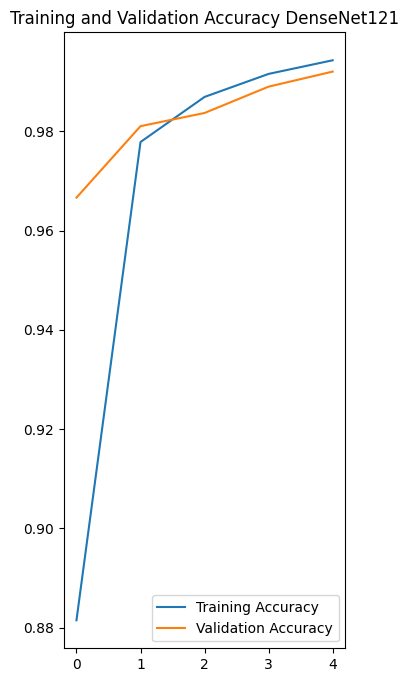

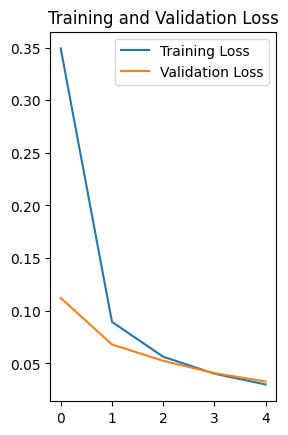

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy DenseNet121')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Making predictions with test images.

In [21]:
predictions = model.predict(test_set)

2023-09-27 19:22:36.134051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


463/463 [==============================] - 81s 169ms/step


In [22]:
y_pred = np.argmax(predictions, axis=-1)

ImageDataGenerator infers the class labels from the directories name. We want to check the class labels.

In [23]:
test_set.class_indices

{'Grape Black Measles': 0, 'Grape Black rot': 1, 'Grape Healthy': 2}

We want to evaluate our model's performance with the test images.

In [27]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image


# Image Path
image_path = './Grape/test/black-rot-of-grape_figure-1.jpg' 

# Load saved model
model = tf.keras.models.load_model('./DenseNet121_grape_leaves-OUBADRISS.h5')

# Function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array


# Preprocess the image
preprocessed_image = preprocess_image(image_path)

#Predictions
predictions = model.predict(preprocessed_image)

#class labels
class_labels = ['Black measles', 'Black rot', 'Healthy','Isariopsis']  

# Get the predicted class
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class}")
print(f"Confidence score: {predictions[0][predicted_class_index]}")


2023-09-27 19:57:49.520370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
Predicted class: Black rot
Confidence score: 0.9162179827690125
